In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns

In [206]:
df=pd.read_csv("IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [208]:
print("number of rows:",df.shape[0])
print("number of colomns:",df.shape[1])

number of rows: 150
number of colomns: 5


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [212]:
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}' )

number of duplicated rows are 3


In [214]:
df.drop_duplicates(inplace=True)

In [216]:
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}' )

number of duplicated rows are 0


In [218]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [220]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


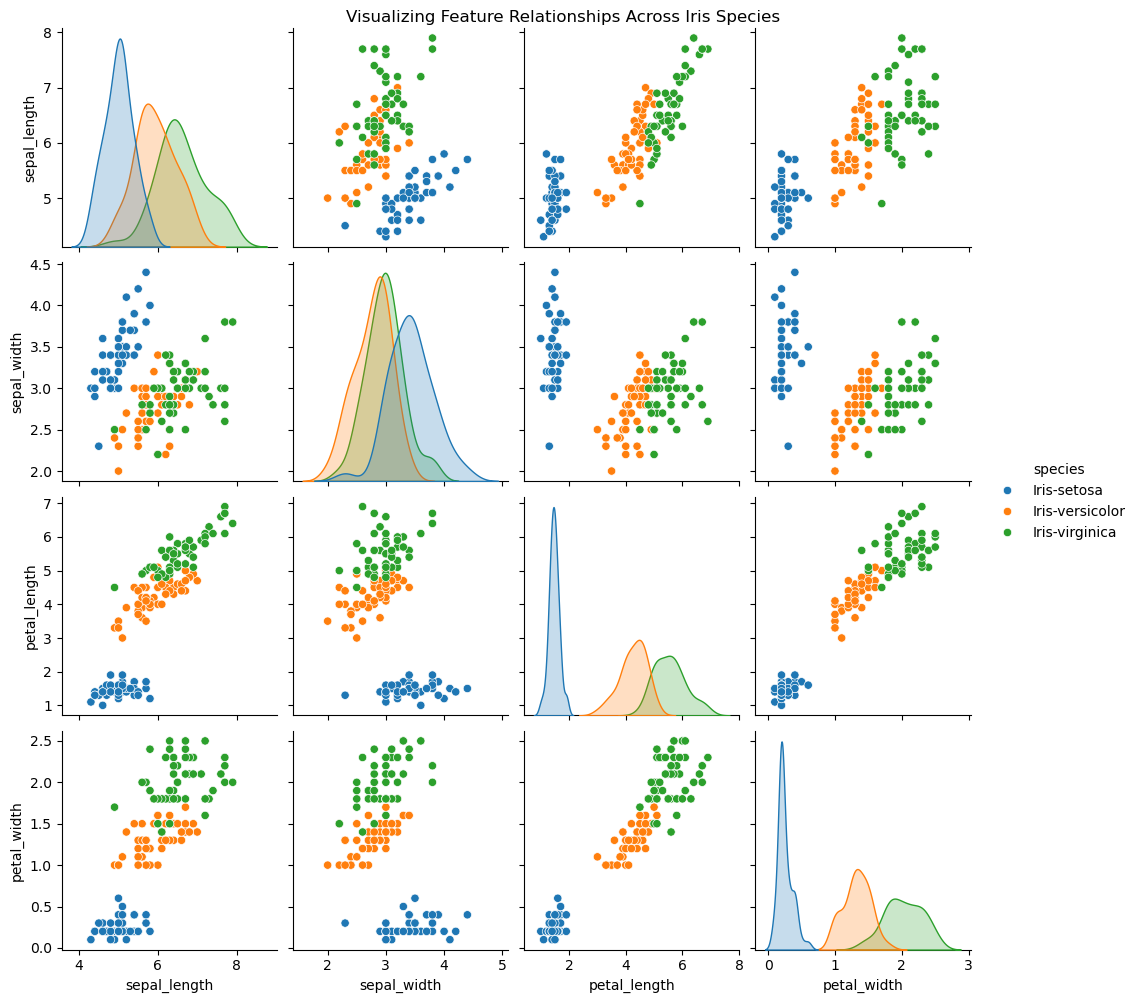

In [222]:
plot = sns.pairplot(df, hue="species")
plot.fig.suptitle("Visualizing Feature Relationships Across Iris Species", y=1)  
plt.show()

In [223]:
data = df.values
x=data [:,0:4]
y=data[:,4]
a=data[:,4]

In [224]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [225]:
#SVC
from sklearn.svm import SVC
model_svc = SVC()
model_svc.fit(x_train,y_train)

SVC()

In [283]:
predict_svc = model_svc.predict(x_test)
from sklearn.metrics import accuracy_score
print ("accuracy of SVC model:",accuracy_score(y_test,predict_svc))

accuracy of SVC model: 0.9333333333333333


In [287]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict_svc))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



In [231]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
model_random = RandomForestClassifier(random_state=42)
model_random.fit(x_train,y_train)
predict_random = model_random.predict(x_test)
print (accuracy_score(y_test,predict_random))

0.9333333333333333


In [289]:
print(classification_report(y_test,predict_random))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



In [235]:
#Logistic regresssion
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression()
model_LR.fit(x_train,y_train)

LogisticRegression()

In [241]:
predict_LR=model_LR.predict(x_test)
print (accuracy_score(y_test,predict_LR))

0.9333333333333333


In [291]:
print(classification_report(y_test,predict_LR))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



In [269]:
from sklearn.tree import DecisionTreeClassifier
model_DTC = DecisionTreeClassifier()
model_DTC.fit(x_train,y_train)


DecisionTreeClassifier()

In [279]:
predict_DTC= model_DTC.predict(x_test)
print (accuracy_score(y_test,predict_DTC))

0.9333333333333333


In [295]:
print(classification_report(y_test,predict_DTC))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



In [303]:
#logistic regression
x_new = np.array([[3,2,1,0.2],[4.9,2.2,3.8,1.1],[5.3,2.5,4.6,1.9]])
predict1=model_LR.predict(x_new)
print("prediction of species :{}".format(predict1))

prediction of species :['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [305]:
#SVC
x_new = np.array([[3,2,1,0.2],[4.9,2.2,3.8,1.1],[5.3,2.5,4.6,1.9]])
predict2=model_svc.predict(x_new)
print("prediction of species :{}".format(predict1))

prediction of species :['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
